<a href="https://colab.research.google.com/github/galhev/Text-Classification/blob/master/Text_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StartApp Text Classification Challenge


Task in classifying mobile apps into different categories in order to understand user behavior. 
The main goal is to design a segment classification algorithm that is based on the description given by the app creator. 

First, I will import the relevant packages and files.

In [0]:
#@title don't show code till dblclick

from google.colab import files
uploaded = files.upload()

In [0]:
#@title don't show code till dblclick
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk

In [0]:
#@title don't show code till dblclick

df = pd.read_excel('appDescriptions.xlsx', sheet_name = 'Examples')
df = pd.DataFrame(df)

In [187]:
#@title don't show code till dblclick
df.shape

(1494, 5)

In [188]:
#@title don't show code till dblclick
df.nunique()

appId          1494
package        1494
appName        1488
segment          22
description    1492
dtype: int64

There are 1494 different applications to classify and 22 segments in total.

Let's take a look at the data.

In [189]:
#@title don't show code till dblclick
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 5 columns):
appId          1494 non-null int64
package        1494 non-null object
appName        1494 non-null object
segment        1494 non-null object
description    1494 non-null object
dtypes: int64(1), object(4)
memory usage: 58.4+ KB


In [190]:
#@title don't show code till dblclick
df.head(10)

appId  ...                                        description
0   8218876735178300  ...  [ смсфинанс } помогает вам каждый раз, когда д...
1  12956406968201529  ...  JOOX is here, it’s the FREE music streaming ap...
2  14001276947357815  ...  This simple and practical flashlight tool is t...
3  14289825651881422  ...  Leśne domki czekają, aż je umeblujesz! Wybierz...
4  17734052595911731  ...  Ally brings together all your transport option...
5  18492495551216135  ...  일본에서 가장 인기 있는 리듬 액션 게임![러브 라이브] 시리즈에 등장하는 스쿨 아...
6  18934343517180132  ...  Справочник болезней с подробным описанием, леч...
7  21641372805917807  ...  Start banking wherever you are with IBC Mobile...
8  23404641023527022  ...  Al'Quran Bahasa Indonesia- Read the Quran in B...
9  25931367678299913  ...  We've given DB Navigator a totally new look. Y...

[10 rows x 5 columns]

It seems that there are few different languages that are used to describe the apps.

In this task I will classify just the non English descriptions and all the rest will be classified as "Not supported language"

Next I'll check if there are null attributes that need to be treated and if the segments are balanced

In [191]:
#@title don't show code till dblclick
df.isnull().sum()

appId          0
package        0
appName        0
segment        0
description    0
dtype: int64

In [192]:
#@title don't show code till dblclick

df.segment.value_counts()

Vehicles                          150
Shopping                          140
Social Media                      139
Personalization & Productivity    130
Finance                           126
Arts & Entertainment              125
Technology & Computers            110
Hobbies                           108
Games                              86
Health & Personal care             75
Sports & Recreation                66
News & Current Events              52
Food & Drink                       47
Lifestyles                         45
Education                          34
Travel                             32
Parenting & Family                  8
Fashion & Beauty                    7
Business                            7
Career & Employment                 5
Home & Garden                       1
Adult Content                       1
Name: segment, dtype: int64

It seems that there are segments with just one entry and the data is imbalanced.

Next I would like to check the length of each app description. The way to do that is by extracting the description length and present all by a boxplot graph.

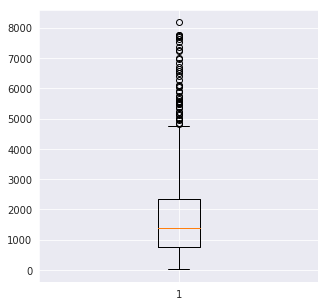

In [193]:
#@title don't show code till dblclick

desc_len = [len(desc) for desc in df.description]

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(desc_len)
plt.show()

In [194]:
#@title don't show code till dblclick

print("The minimum length of description is: {}\nThe maximum length of description is: {}".format(min(desc_len) , max(desc_len)))

The minimum length of description is: 14
The maximum length of description is: 8178


It doesn't make sense to describe the app with 8000 word.

So let's check what is written in the longest description element

In [195]:
#@title don't show code till dblclick

df.description.loc[desc_len.index(8178)]

'世界で1億5千万ダウンロード突破！Android版ドルフィンブラウザ（Dolphin Browser）は、最速のフラッシュ対応無料Androidブラウザーです。あなたのアンドロイドの可能性を広げる、スマホ・タブレットならではの機能が満載。フラッシュ、アドブロック、Chromeブラウザやfirefoxとのブックマーク同期...ぜひ使っていただきたい、人気の機能がこちら！✔Webゲームやフラッシュ動画を速く、楽しくデバイスにFlash Player（フラッシュプレイヤー）をインストールし、ドルフィンの設定からプラグインを有効にすることで、4.1、4.2、4.3はもちろん、4.4（KitKat）でも動画などのFlashコンテンツが閲覧可能！HTML5対応なので、Webゲームを楽しむ方にはその速さをより実感していただけます。Flashの設定について、Flash Playerについて詳しくは、こちら↓http://goo.gl/R829eo※端末によって対応内容が異なります。※Flashプレイヤーは別途無料ダウンロードが必要です。✔他社ブラウザとブックマークを同期！パソコンでChromeブラウザ、Firefoxブラウザをお使いのみなさま。ドルフィンの拡張機能（エクステンション）*を使えば、ワンタップでお使いのChromeブラウザまたはFirefoxとブックマークやタブが同期できます。ブックマークは左端から右にスワイプ（フリック）するだけ！サイドバーからの簡単アクセスが人気です。同期の方法について詳しくは、こちら↓http://goo.gl/n2RkQr※Chromeブラウザ、Firefoxとはブックマークやタブをリアルタイムに同期ができる他、Yahooブラウザ、Opera、Puffinなど他社ブラウザのブックマークをインポートすることも可能です。✔パソコンのようなブラウジング体験パソコンがなくても大丈夫！？ユーザエージェントを使えば、AndroidからでもパソコンやiPhoneから閲覧しているような状態に。タブブラウジングだから、面倒な画面の移動なしでウェブページを素早く簡単に開いたり、切り替えたりできます。サイドバーによるブックマークの呼び出しや管理のしやすさも、パソコンのブラウザー並み。もちろん、フルスクリーンにも対応。Android端末の限られたスペースを有効活用でき

 We can see that there are descriptions that combine few different languages and links 
 so the next step will be data cleaning.


Now, after looking at the description and the other columns it seems that the app name will be written usually in non English words if it is app for non English speakers. 
The other columns "package" or the "app ID" are unique for each app that will not help for the classification task.

In [0]:
#@title don't show code till dblclick

def isNonEnglishAppName(txt):
  txt = str(txt)
  first_len = len(txt.strip())  
  txt= re.sub(r"[a-zA-Z]", "", txt).strip()  
  return len(txt)==first_len

In [0]:
#@title don't show code till dblclick

df['class'] = df['segment']
df['full_desc'] = df['description']

In [0]:
#@title don't show code till dblclick

df_NonEnglish = df[df['class']=="Not supported language"]
df = df.drop(df[df['class']=="Not supported language"].index, axis = 0)
# Reset rows numbers 
df = df.reset_index(drop=True)

## Text Preprocessing

The cleaning part will be done in few steps, first all the letters will be converted to lowecase and than contractions, urls, email adresses, links, numbers, punctions will be removed. 

Then, than I will activate the lemmatization part and remove non English words. 
The last step will deal with English stop words and irrelevant custom stop words that I found in the dataset. 

#### Convert text to lowecase

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: x.lower())

#### Expand Contractions

In [0]:
#@title don't show code till dblclick

CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [0]:
#@title don't show code till dblclick

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: expand_contractions(x))

#### Clean URLs

In [0]:
#@title don't show code till dblclick

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
www_pat = r'www.[^ ]+'

combined_pat = r'|'.join((pat1, pat2))

df['description'] = df['description'].apply(lambda x: re.sub(combined_pat,'',x))
df['description'] = df['description'].apply(lambda x: re.sub(www_pat,'',x))

#### Remove Punctuation

In [204]:
#@title don't show code till dblclick

import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
#@title don't show code till dblclick

def remove_punctuation(txt):
    clean_txt = "".join([char for char in txt if char not in string.punctuation])
    return clean_txt

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: remove_punctuation(x))

#### Clean email adresses

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: re.sub(pat1,'',x))

#### Remove numbers

In [0]:
#@title don't show code till dblclick

dig = r'\d+'
df['description'] = df['description'].apply(lambda x: re.sub(dig,'',x))

Next step is lemmatization. lemmatization reduces the word into dictionary root form. For instance "cats" is converted into "cat". Lemmatization is done in order to avoid creating features that are semantically similar but syntactically different. For instance, we don't want two different features named "cats" and "cat", which are semantically similar, therefore we perform lemmatization.

  #### Lemmatization


In [209]:
#@title don't show code till dblclick

nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
#@title don't show code till dblclick

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
def textLemma(txt):
  txt = txt.split()
  txt = [stemmer.lemmatize(word) for word in txt]
  txt = ' '.join(txt)
  return txt


In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: textLemma(x))

One way to deal with non English description is to mark all the apps that have more than 60% non English words. Then I'll clean the data from words that are not in English.

Sometimes the words are in English but use as a slang so the package will not recognize it properly or maybe there is a bilingual description. 

#### Check the language

In [0]:
#@title don't show code till dblclick

def isNonEnglishDesc(txt):
  splitted_txt = txt.split()
  txt_len = len(splitted_txt)
  
  is_english = [1 for word in splitted_txt if isEnglishWord(word)]   
  return (sum(is_english)/txt_len) < 0.4


def isEnglishWord(word):  
  try:
      word.encode(encoding='utf-8').decode('ascii')
  except UnicodeDecodeError:
      return False
  else:
      return True

In [0]:
#@title don't show code till dblclick

df['class'] = df.apply(lambda x: "Not supported language" if isNonEnglishDesc(x['description']) else x['class'], axis = 1)

nonEnglish = df[df['class']=="Not supported language"]
df_NonEnglish = pd.concat([nonEnglish, df_NonEnglish])

df = df.drop(df[df['class']=="Not supported language"].index, axis = 0)
# Reset rows numbers 
df = df.reset_index(drop=True)

In [0]:
#@title don't show code till dblclick

def concat_words(word_list):
  sentance = " ".join(word for word in word_list)
  return sentance

def removeNonEnglish(txt):
  splitted_txt = txt.split()
  txt_len = len(splitted_txt)  
  english_desc = [word for word in splitted_txt if wordnet.synsets(word)]
  english_desc = concat_words(english_desc)
  return english_desc

An example for bilingual description that will be treated by removeNonEnglish function 

In [215]:
#@title don't show code till dblclick

df.description[4]

'일본에서 가장 인기 있는 리듬 액션 게임러브 라이브 시리즈에 등장하는 스쿨 아이돌 aqours와 μ’ｓ를 서포트하고 라이브를 멋지게 성공시키세요리듬에 맞춰 화면을 탭 하는 쾌적하고 즐거운 리듬 게임입니다개성 있는 리듬 액션리듬에 맞춰 알맞은 타이밍에 화면을 탭 하고 유닛의 라이브를 성공으로 이끌어주세요완벽한 탭으로 콤보를 연결하면 스코어 up곡 이상의 오리지널 곡을 즐길 수 있습니다자신만의 오리지널 유닛 만들기aqours와 μ’ｓ 등 다양한 스쿨 아이돌이 등장마음에 드는 스쿨 아이돌로 자신만의 유닛을 만들고 라이브에 도전해보세요부원 육성연습으로 부원을 성장시키자같은 부원끼리 특별 연습을 하면 귀여운 의상으로 각성오리지널 풀 보이스가 들어간 메인 스토리메인 스토리에는 aqours와 μ’ｓ 멤버가 모두 출연멤버들과의 에피소드를 읽어 보세요각 부원의 사이드 스토리인연이 깊어진 부원은 전용 스토리가 오픈물론 aqours와 μ’ｓ 멤버는 오리지널 풀 보이스 the most popular rhythm action game in japanlove live school idol featured in the series supported by the aqours and μs success to you and to live beautifullytap the screen to the rhythm the rhythm is pleasant and enjoyable game personality rhythm actiontap the screen to the rhythm and the timing appropriate please bring the unit to the success of the livewhen you connect your perfect combo tab score upyou can enjoy more than song original songscreate your own original unit aqours and μs such a variety of school 

In [216]:
#@title don't show code till dblclick

removeNonEnglish(df.description[4])

'most popular rhythm action game in live school idol featured in series supported by success live screen rhythm rhythm is pleasant enjoyable game personality rhythm screen rhythm timing appropriate please bring unit success connect perfect combo tab score can enjoy more song original own original unit such a variety school idol own unit school idol favorite try challenging foster let grow same exercise special vigilance together a cute main story original full voice went in both main story member have episode side story ha deepened tie open a dedicated course member are original full voice'

We can see that after the cleaning all the non English words will be removed.

Added in retrospect  - I will also save the original length for comparison in the next steps.

In [0]:
#@title don't show code till dblclick

df["original_length"] = df["description"].apply(lambda x: len(x))

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: removeNonEnglish(x))

#### Remove single letters

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: re.sub(r"\b[a-zA-Z]\b", "", x))

#### Remove words with only two letters

In [0]:
#@title don't show code till dblclick

def checkWordLength(txt):
  splitted_txt = txt.split()
  more_than_two_words = " ".join([word for word in splitted_txt if((len(word)>=3)|(word=='no'))])   
  return more_than_two_words

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: checkWordLength(x))

### Cleaning stop-words


Stop Words are words which do not contain important significance, such as “the”, “of”, etc. It is often assumed that removing stop words is a necessary step, and will improve the model performance.

In [0]:
#@title don't show code till dblclick

def remove_stop_words(txt, to_remove):
  for w in to_remove:
      pattern = r'\b'+w+r'\b'
      txt = re.sub(pattern, '', txt)
  return txt

In [223]:
#@title don't show code till dblclick

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
#@title don't show code till dblclick

from nltk.corpus import stopwords

en_stop_words = stopwords.words('english')
df['description'] = df['description'].apply(lambda x: remove_stop_words(x, en_stop_words))
sp_stop_words = stopwords.words('spanish')
df['description'] = df['description'].apply(lambda x: remove_stop_words(x, sp_stop_words))

Spanish letters are harder for identifying so I decided also to remove the spanish stop words that were not be identified in the previous steps.

Next I will check for custom stop words that are found in the dataset.

In [225]:
#@title don't show code till dblclick

from sklearn.feature_extraction.text import CountVectorizer

cVec = CountVectorizer()
cVec.fit(df.description)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [226]:
#@title don't show code till dblclick

len(cVec.get_feature_names())

9116

It looks like the count vectorizer has extracted 9,116 words out of the corpus.

In [0]:
#@title don't show code till dblclick

cVec = CountVectorizer()
cVec.fit(df.description)
desc_matrix = cVec.transform(df.description)

Let's see what are the top 50 words in the app description on a bar chart.

In [228]:
#@title don't show code till dblclick

batches = np.linspace(0,700000,10).astype(int)
i=0
pos_tf = []
while i < len(batches)-1:
    batch_result = np.sum(desc_matrix[batches[i]:batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print (batches[i+1],"entries' term freuquency calculated")
    i += 1

77777 entries' term freuquency calculated
155555 entries' term freuquency calculated
233333 entries' term freuquency calculated
311111 entries' term freuquency calculated
388888 entries' term freuquency calculated
466666 entries' term freuquency calculated
544444 entries' term freuquency calculated
622222 entries' term freuquency calculated
700000 entries' term freuquency calculated


In [229]:
#@title don't show code till dblclick

pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([pos],columns=cVec.get_feature_names()).transpose()
term_freq_df.columns = ['amount']
term_freq_df.sort_values(by='amount', ascending=False).iloc[:10]

amount
free        977
android     826
get         795
phone       748
photo       705
mobile      702
new         676
use         665
video       618
device      615

Text(0.5, 1.0, 'Top 50 tokens in description')

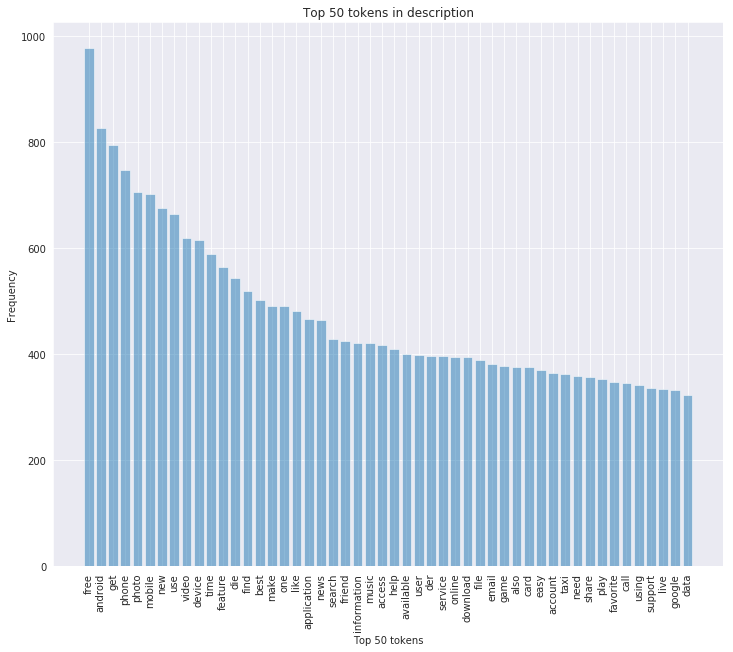

In [230]:
#@title don't show code till dblclick

y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='amount', ascending=False)['amount'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='amount', ascending=False)['amount'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 tokens')
plt.title('Top 50 tokens in description')

Some of the 50th most frequent words seem to be generic and insignificant for the classification task, so I also defined my custom stop words list, which contains top 20 most frequent words in the corpora: "application", “free”, “android”, “mobile”, “phone” and I decided to remove them all except words like "photo", "video" and "news" that can be relevant for the segmentation,

In [0]:
#@title don't show code till dblclick

sorted_freq_words = term_freq_df.sort_values(by='amount', ascending=False).iloc[:20]

In [0]:
#@title don't show code till dblclick

freq_words_list = list(sorted_freq_words.reset_index()["index"])
freq_words_list.remove("news")
freq_words_list.remove("video")
freq_words_list.remove("photo")

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: remove_stop_words(x, freq_words_list))

#### Deal with latin languages

Let's take a brief look on the dataset after data cleaning

In [234]:
#@title don't show code till dblclick

df.description.head(30)

0       music streaming  music lover million track l...
1     simple practical flashlight tool latest cheeta...
2     jak forest cottage waiting furnish choose appl...
3     ally brings together  transport option  allowi...
4      popular rhythm action game live school idol f...
5     start banking wherever    available  online ba...
6     bahasa indonesia read quran bahasa indonesia r...
7      given navigator totally  look personal travel...
8     fast home delivery local store  target user   ...
9     indonesia indonesia  yang yang dari online med...
10    google power  read text screen aloud example  ...
11     quickly check current position  train automat...
12    carry bank pocket banking axis bank  touch awa...
13    fast cleaner speed booster   cleaner ram boost...
14    created     mix  busy man    hear mix live cer...
15    contact leading contact  book powered caller s...
16     dia dia ver uma  chat  dia   agora  dia dia  ...
17    see  recently named consumer report   shop

Seems that still latin languages weren't removed properly.

I'll try another method that takes a bit more time but will go over the non English words that were left will remove them.

In [235]:
#@title don't show code till dblclick

import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [0]:
#@title don't show code till dblclick

words = set(nltk.corpus.words.words())

def RemoveLatinLanguages(txt):
  english_desc = " ".join(w for w in nltk.wordpunct_tokenize(txt) \
           if w in words or not w.isalpha())
  return english_desc

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: RemoveLatinLanguages(x))

I'll check again after the cleaning part if it created null entries and if the description length was changed


In [238]:
#@title don't show code till dblclick

df.isnull().sum()

appId              0
package            0
appName            0
segment            0
description        0
class              0
full_desc          0
original_length    0
dtype: int64

In [239]:
#@title don't show code till dblclick

desc_len = [len(desc) for desc in df.description]

print("The minimum length of description is: {}\nThe maximum length of description is: {}".format(min(desc_len) , max(desc_len)))

The minimum length of description is: 0
The maximum length of description is: 2644


 It seems that there are descriptions that were left with 0 letters, it probaably because of the language cleaning so those entries will be considered as "Non English descriptions".
 
Too short description can also be suspicious, let's take a look on the shortest descriptions.

In [240]:
#@title don't show code till dblclick

minimum_words_in_desc = 50
less_than_min = [x[0] for x in enumerate(desc_len) if x[1] < minimum_words_in_desc]
df.description.loc[less_than_min]

16                                      chat agora menu
20                                                  web
42                                            van benne
54                           start dash campaign puzzle
70       bank pronto bank bank twitter dinero bank bank
93                        simple base rede pronto canal
103                                         polska jest
107                                                    
127              groove colorado propaganda agora toque
149                                                    
150           encyclopedia many various cooking cooking
169          yang yang suite dari yang yang user gratis
176         restaurant coupon restaurant stand geld den
180                            taxi taxi taxi taxi taxi
185                    meal meal sure hem hem sure meal
206     agora tempo barcelona granada jerez sierra faro
221                                  taxi taxi data dal
236                         leer horizontal clar

After careful look it seems that the shortest descriptions are non English descriptions so can also be considered as "Non English Description"

In [0]:
#@title don't show code till dblclick

actual_length = df["description"].apply(lambda x: len(x))
big_gap_with_original_desc = df["original_length"] > actual_length*0.9

In [242]:
#@title don't show code till dblclick

df[(big_gap_with_original_desc) & (actual_length < minimum_words_in_desc)].full_desc

16      Conheça o App Itaucard! Fácil e moderno para o...
20                                         Web Antivirus.
42      Bárhol is van, az Ön személyes edzője!Napi has...
54      "เอ๋ ? คู่รักของฉันคือเจ้าชาย 100 คนงั้นเหรอ !...
70      Localiza ATM - Encuentra tu banco - Cajero Aut...
93      O MEO Táxi é uma app simples e gratuita que pe...
103     Aplikacja zawiera pełną aktualną bazę graficzn...
107     O TecMundo chegou ao Android! Leve os principa...
127     Chavinho Groove é um aplicativo que executa os...
149     Prostřednictvím této aplikace si můžete objedn...
150     موسوعة الطبخالموسوعة العربية التي تحتوي العديد...
169     Apakah Anda pencinta musik? Apakah Anda memili...
176     אפליקציית המשלוחים של תן ביס מכל המסעדות.כל אח...
180     Najjednoduchší spôsob cestovania je teraz ešte...
185     Diyanet İşleri Başkanlığı Kur'an-ı Kerim Uygul...
206     Agora é possível chamar o táxi mais próximo de...
221     Richiedi un TAXI in varie città italiane,Milan...
236     القرآن

In [0]:
#@title don't show code till dblclick

condition = (big_gap_with_original_desc) & (actual_length < minimum_words_in_desc)
df.loc[condition, ['class']] = "Not supported language"

In [244]:
#@title don't show code till dblclick

nonEnglish = df[df['class']=="Not supported language"]
df_NonEnglish = pd.concat([nonEnglish, df_NonEnglish])

df = df.drop(df[condition].index, axis = 0)
# Reset rows numbers 
df = df.reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


#### Remove whitespaces

In [0]:
#@title don't show code till dblclick

df['description'] = df['description'].apply(lambda x: x.strip())

In [246]:
#@title don't show code till dblclick

df.shape

(1231, 8)

#### Check "Not Supported Languages" 

In the data cleaning procedure I cleaned the data from different languages, let's check if the cleaning part caught the non English descriptions.

In [247]:
#@title don't show code till dblclick

df_NonEnglish.full_desc

16      Conheça o App Itaucard! Fácil e moderno para o...
20                                         Web Antivirus.
42      Bárhol is van, az Ön személyes edzője!Napi has...
54      "เอ๋ ? คู่รักของฉันคือเจ้าชาย 100 คนงั้นเหรอ !...
70      Localiza ATM - Encuentra tu banco - Cajero Aut...
93      O MEO Táxi é uma app simples e gratuita que pe...
103     Aplikacja zawiera pełną aktualną bazę graficzn...
107     O TecMundo chegou ao Android! Leve os principa...
127     Chavinho Groove é um aplicativo que executa os...
149     Prostřednictvím této aplikace si můžete objedn...
150     موسوعة الطبخالموسوعة العربية التي تحتوي العديد...
169     Apakah Anda pencinta musik? Apakah Anda memili...
176     אפליקציית המשלוחים של תן ביס מכל המסעדות.כל אח...
180     Najjednoduchší spôsob cestovania je teraz ešte...
185     Diyanet İşleri Başkanlığı Kur'an-ı Kerim Uygul...
206     Agora é possível chamar o táxi mais próximo de...
221     Richiedi un TAXI in varie città italiane,Milan...
236     القرآن

In [0]:
#@title don't show code till dblclick

# Download df_NonEnglish
df_NonEnglish.to_csv('df_NonEnglish.csv')
files.download('df_NonEnglish.csv')

Seems that the cleaning step worked while I had 9 mistakes of short descriptions that were considered wrongly as non English and another 5 bilingual descriptions out of 258 descriptions that were identified as non English.

 I can add another columns that indicate the length before and after the cleaning and if there is no change so it make sense that the description will be short.

In [0]:
#@title don't show code till dblclick

# Download df_English
df.to_csv('df_English.csv')
files.download('df_English.csv')

## Visualization

Let's check the description length distribution. If there is a difference between each segment it can be added as another feature to the future model.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


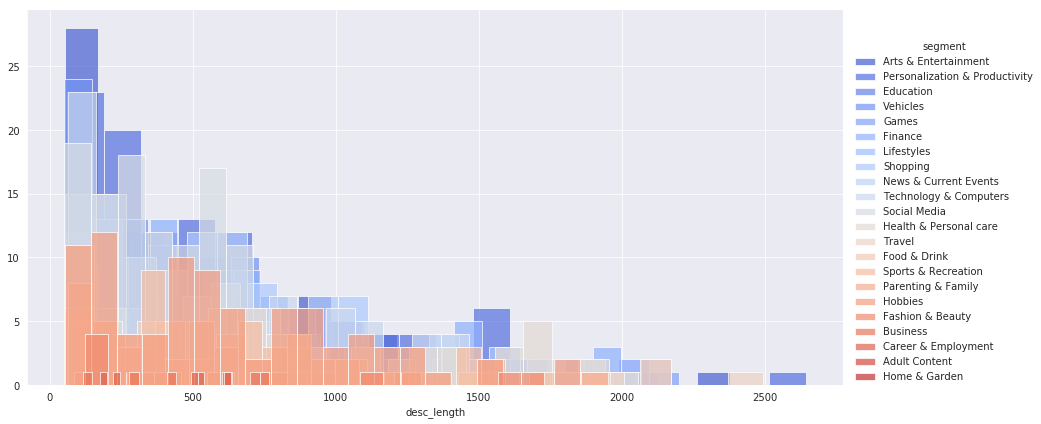

In [250]:
#@title don't show code till dblclick

df['desc_length'] = df["description"].apply(lambda x: len(x))

sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="segment",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'desc_length',bins=20,alpha=0.7).add_legend()

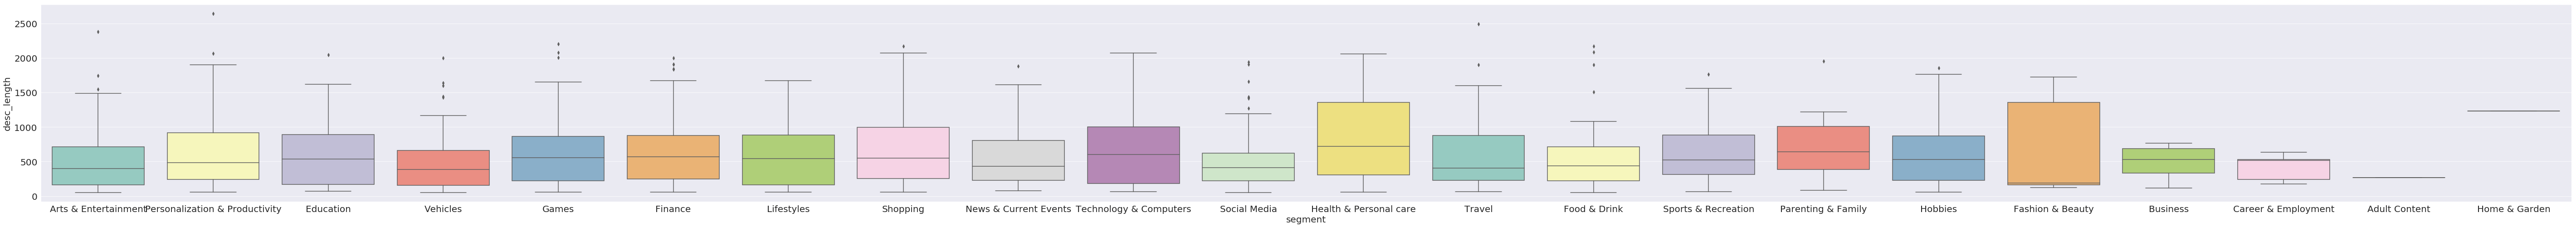

In [251]:
#@title don't show code till dblclick

plt.rcParams.update({'font.size': 20, 'figure.figsize':(100, 8)})
ax = sns.boxplot(x="segment", y="desc_length", data=df, palette="Set3")

Based on the graph it seeams that the segments have more or less the same distribution with a bit of change.

### Word Cloud

Let's visualize the text in some way to understand the data even more. 
The text visualisation I chose for this part is the controversial word cloud. A word cloud represents word usage in a document by resizing individual words proportionally to its frequency, and then presenting them in random arrangement.

In the case of segmet classification, it provides a general idea of what kind of words are frequent in the corpus, in a sort of quick and dirty way.

In [0]:
#@title don't show code till dblclick

segments = list(df.segment.unique())

In [0]:
#@title don't show code till dblclick

from wordcloud import WordCloud

 Word Cloud for Arts & Entertainment Segment


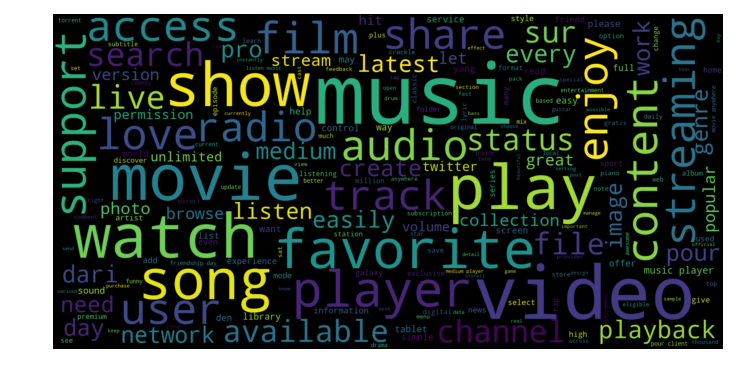

 Word Cloud for Personalization & Productivity Segment


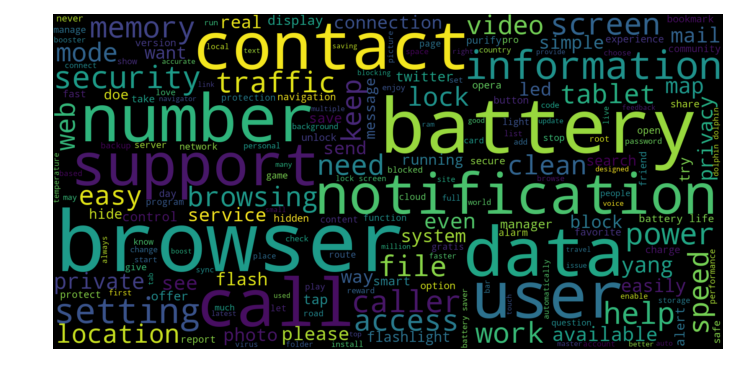

 Word Cloud for Education Segment


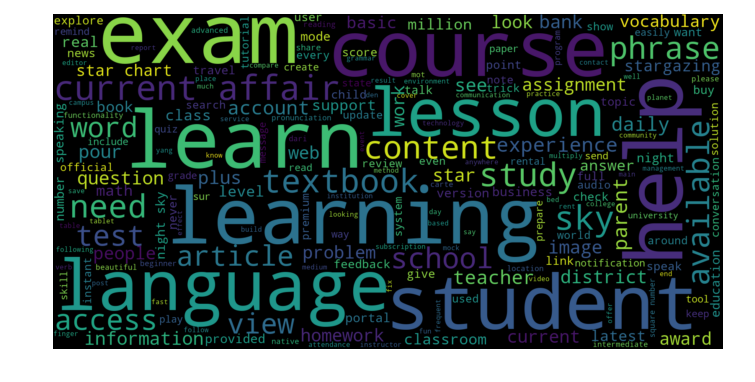

 Word Cloud for Vehicles Segment


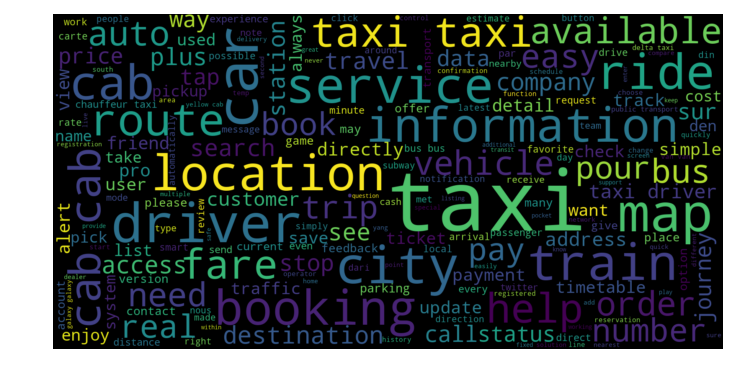

 Word Cloud for Games Segment


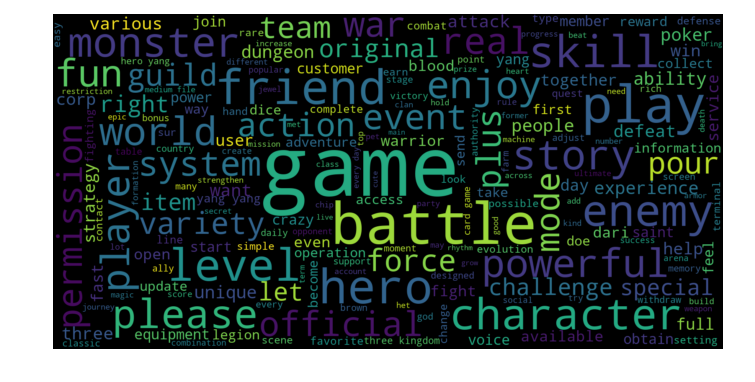

 Word Cloud for Finance Segment


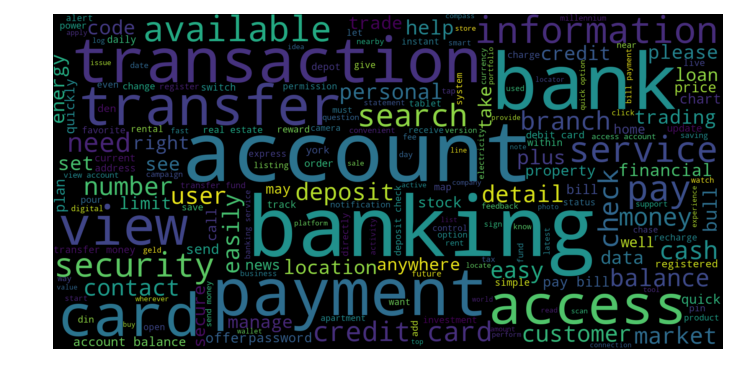

 Word Cloud for Lifestyles Segment


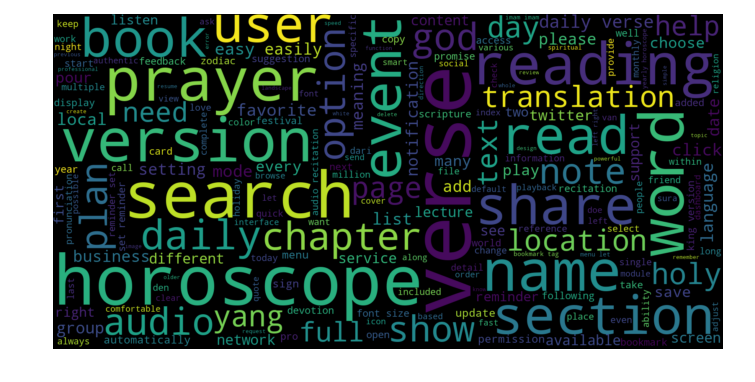

 Word Cloud for Shopping Segment


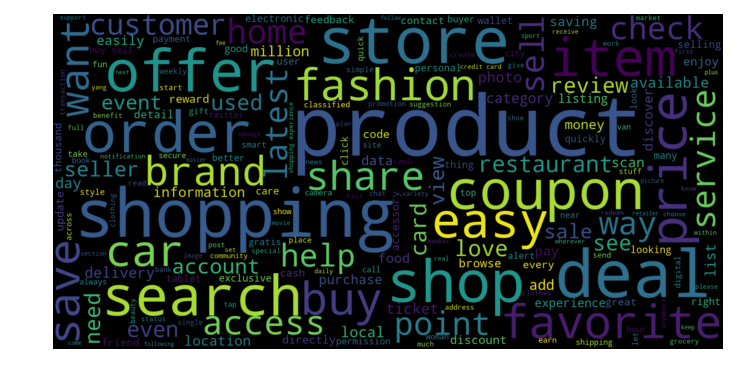

 Word Cloud for News & Current Events Segment


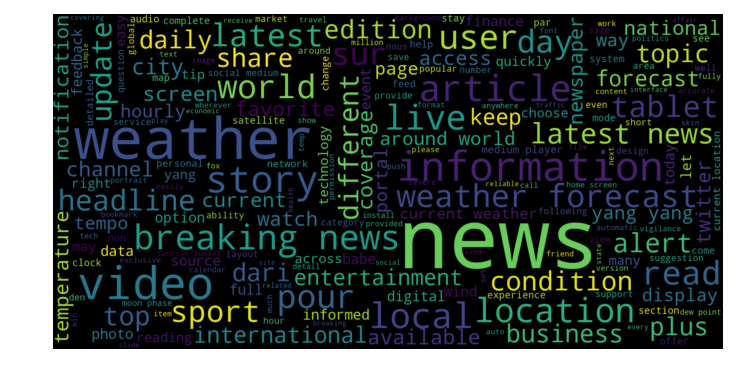

 Word Cloud for Technology & Computers Segment


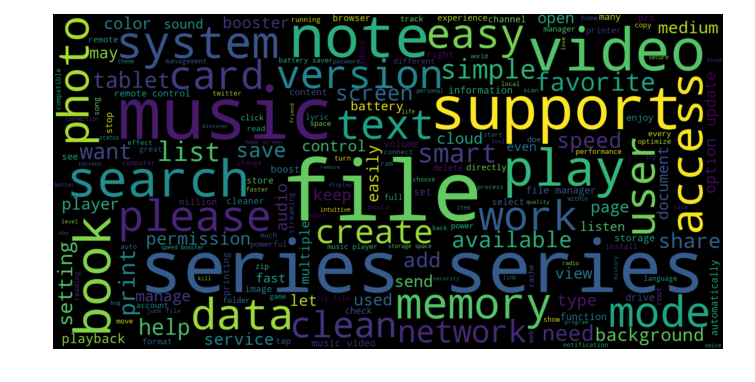

 Word Cloud for Social Media Segment


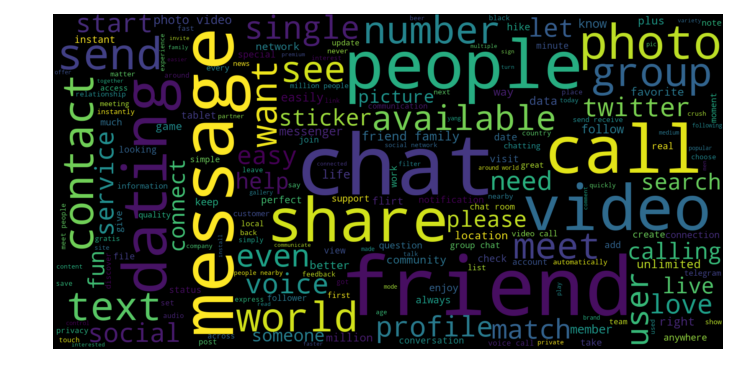

 Word Cloud for Health & Personal care Segment


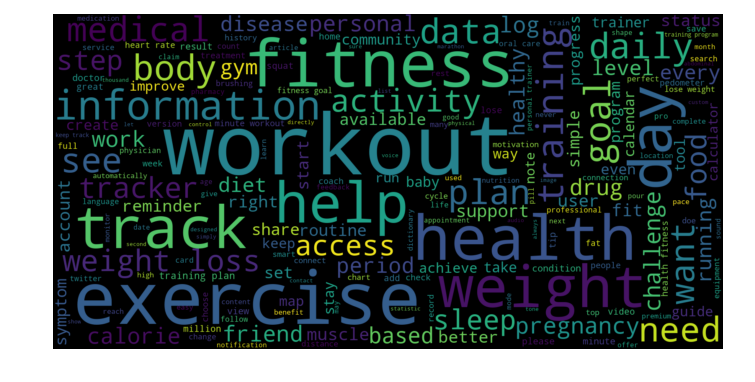

 Word Cloud for Travel Segment


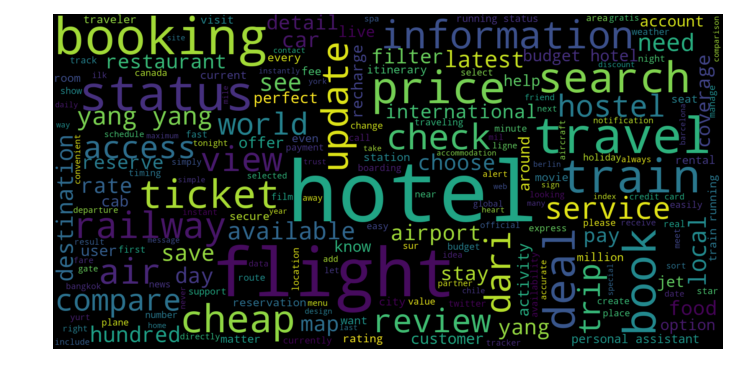

 Word Cloud for Food & Drink Segment


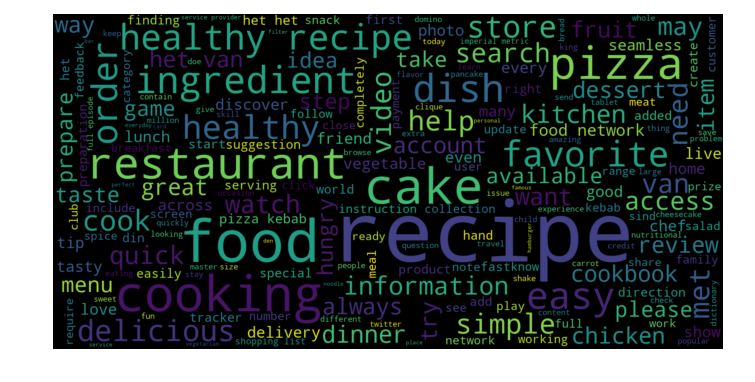

 Word Cloud for Sports & Recreation Segment


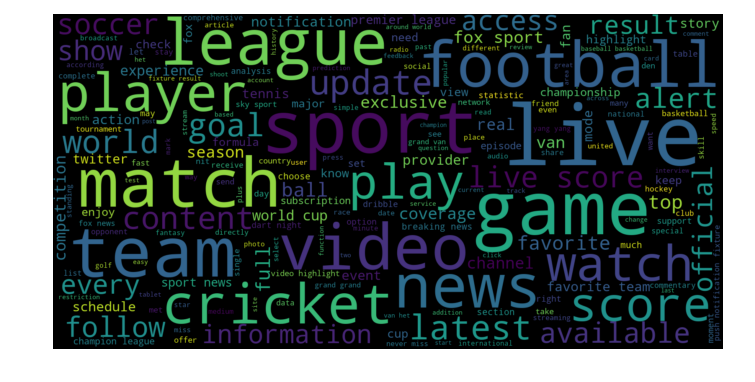

 Word Cloud for Parenting & Family Segment


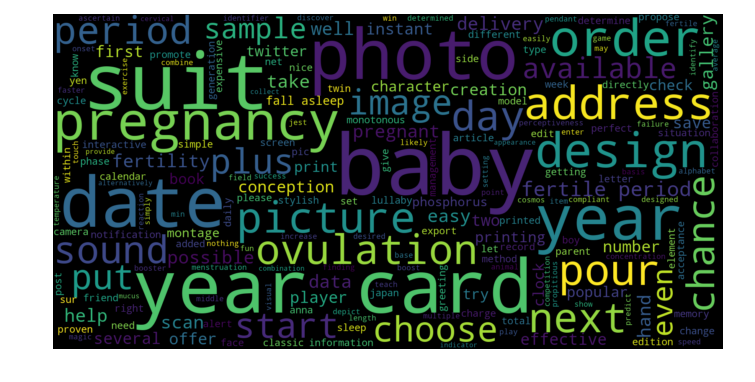

 Word Cloud for Hobbies Segment


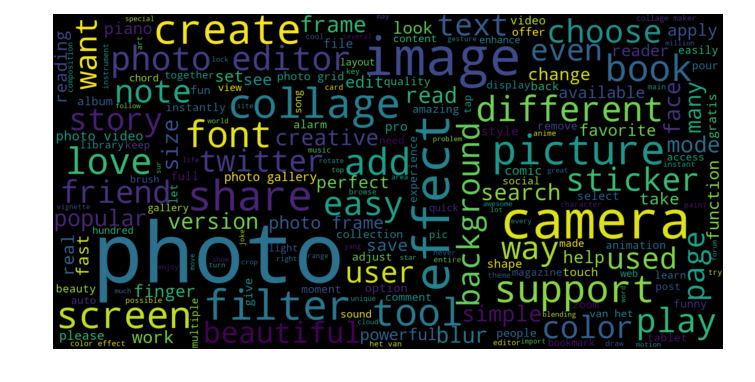

 Word Cloud for Fashion & Beauty Segment


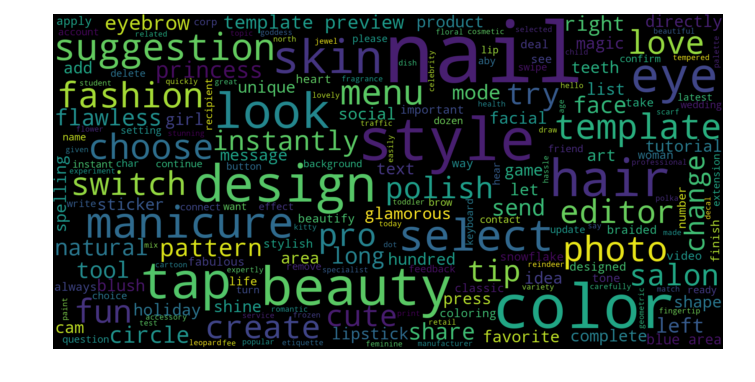

 Word Cloud for Business Segment


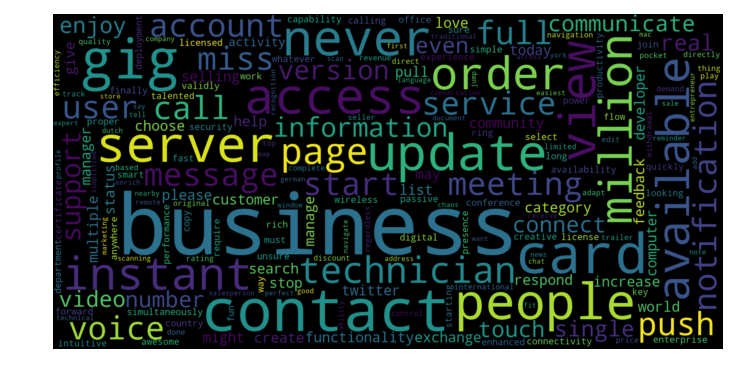

 Word Cloud for Career & Employment Segment


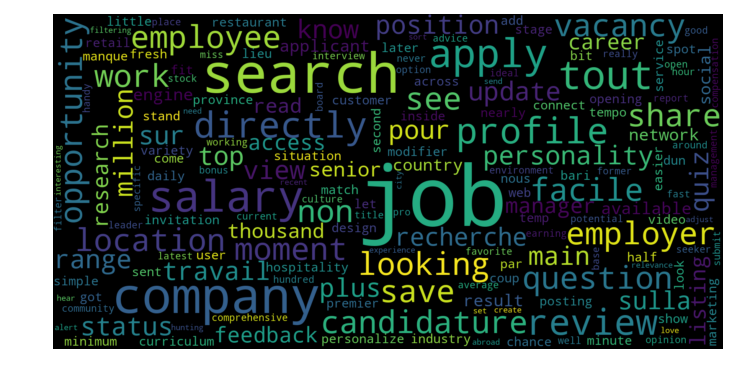

 Word Cloud for Adult Content Segment


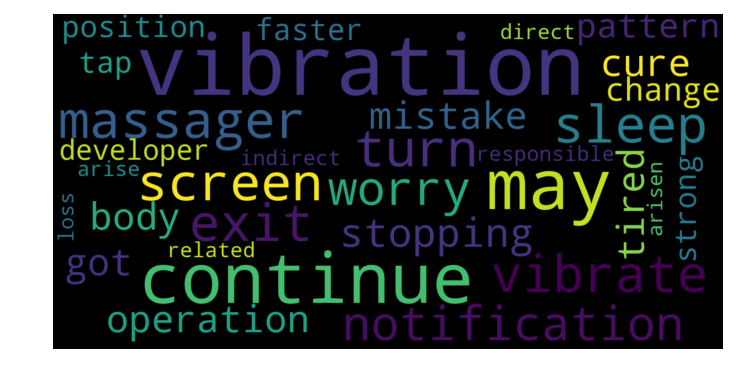

 Word Cloud for Home & Garden Segment


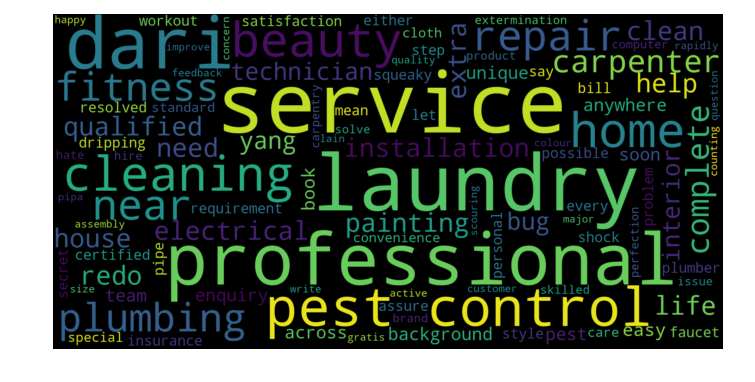

In [254]:
#@title don't show code till dblclick

for seg in segments:
  seg_entries = df[df.segment==seg]
  seg_list = []
  for t in seg_entries.description:
      seg_list.append(t)
  print(" Word Cloud for {} Segment".format(seg))        
  seg_list = pd.Series(seg_list).str.cat(sep=' ')
  # Print cloud
  wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(seg_list)
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()


Some of big words can be interpreted quite neutral , such as “taxi”,”GPS”,etc for "Vehicles" segment for example or "style",  "look", "beauty" for ""fashion & Beauty Segment". 

#### Segment Imbalance

In [0]:
#@title don't show code till dblclick

count_seg_vals = pd.Index(df['class']).value_counts()

In [256]:
#@title don't show code till dblclick

count_seg_vals = pd.DataFrame(count_seg_vals).reset_index()
count_seg_vals

index  class
0                     Social Media    126
1                         Shopping    119
2   Personalization & Productivity    118
3                         Vehicles    107
4             Arts & Entertainment    104
5                          Finance     98
6           Technology & Computers     96
7                          Hobbies     88
8           Health & Personal care     65
9              Sports & Recreation     59
10                           Games     53
11           News & Current Events     44
12                    Food & Drink     34
13                      Lifestyles     33
14                       Education     33
15                          Travel     27
16              Parenting & Family      7
17                Fashion & Beauty      7
18                        Business      6
19             Career & Employment      5
20                   Home & Garden      1
21                   Adult Content      1

It will be impossible to train the data with less than 1 sample in segment so I decided to treat differently segmnets that have less than 10 samples and all the rest will be trained by the model. 

In [0]:
#@title don't show code till dblclick

small_seg = list(count_seg_vals["index"][count_seg_vals["class"]<10])
samp_samll_seg = df[df['class'].isin(small_seg)]
df = df.drop(df[df['class'].isin(small_seg)].index, axis = 0)
# Reset rows numbers 
df = df.reset_index(drop=True)

#### Change the segment name to numeric variable 

In [0]:
#@title don't show code till dblclick

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(list(df['class'].unique()))
df['label'] = le.transform(df['class'])


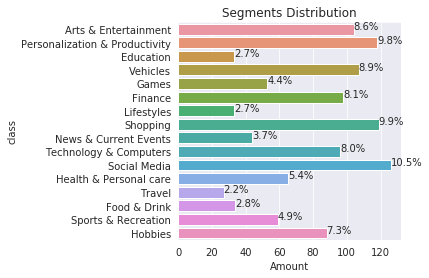

In [259]:
#@title don't show code till dblclick

plt.rcParams.update({'font.size': 10, 'figure.figsize':(4, 4)})

ax = sns.countplot(y=df["class"], data=df)
plt.title('Segments Distribution')
plt.xlabel('Amount')

total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### Feature Extraction

#### Bag of words


If we want to use text in machine learning algorithms, we’ll have to convert them to a numerical representation. The Bag of Words Model and the Word Embedding Model are two of the most commonly used approaches.

The bag of words model ignores grammar and order of words. Once we have a corpus (text data) then first, a list of vocabulary is created based on the entire corpus. Then each data entry is represented as numerical vectors based on the vocabulary built from the corpora.

In [260]:
#@title don't show code till dblclick

from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf = TfidfVectorizer(min_df=5, max_df=0.7, norm='l2', encoding='latin-1', ngram_range=(1, 2))  
x_tfidf = tfidf.fit_transform(df.description).toarray()  
x_tfidf.shape

(1204, 3196)

There are some important parameters that are required to be passed to the constructor of the class. The first parameter is the max_features parameter, which is set didn't set for this point but is really important parameter which remove the words that have a very low frequency of occurrence and are unusually not a good parameter for classifying. 

The next parameter is min_df and it has been set to 5. This corresponds to the minimum number of documents that should contain this feature. So it only include those words that occur in at least 5 entries. Similarly, for the max_df, feature the value is set to 0.7; in which the fraction corresponds to a percentage. Here 0.7 means that it should include only those words that occur in a maximum of 70% of all the entries. Words that occur in almost every segment are usually not suitable for classification because they do not provide any unique information about the segment.


The main issue with term frequency counts is that it favors the sentences that are longer. One way to solve this issue is to normalize the term frequencies with the respective magnitudes or L2 norms. 

ngram_range is set to (1, 2) to consider both unigrams and bigrams. Since I already removed the stop words I don't need to use this parameter now.


The fit_transform function of the CountVectorizer class converts text documents into corresponding numeric features.



The bag of words approach works fine for converting text to numbers. However, it has one drawback. It assigns a score to a word based on its occurrence in a particular description. It doesn't take into account the fact that the word might also be having a high frequency of occurrence in other descriptions as well. TFIDF resolves this issue by multiplying the term frequency of a word by the inverse description frequency. The TF stands for "Term Frequency" while IDF stands for "Inverse Document Frequency".

The term frequency is calculated as:
Term frequency = (Number of Occurrences of a word)/(Total words in the description)  

And the Inverse Description Frequency is calculated as:
IDF(word) = Log((Total number of descriptions)/(Number of descriptions containing the word)) 

#### TODO: Word Embedding -  Word2Vec

There are two main difference between tf/ tf-idf with bag of words and word embeddings: 
1. tf / tf-idf creates one number per word, word embeddings typically creates one vector per word. 
2. tf / tf-idf is good for classification documents as a whole, but word embeddings is good for identifying contextual content.

### Correlations

It is possible to use chi2 test to find the terms that are the most correlated with each of the apps.



In [0]:
#@title don't show code till dblclick

category_id_df = df[['class', 'label']].drop_duplicates().sort_values('label')
category_to_id = dict(category_id_df.values)


In [262]:
#@title don't show code till dblclick

from sklearn.feature_selection import chi2, SelectKBest
import numpy as np
N = 2

cor = pd.DataFrame(columns = ['segment', 'Most correlated unigrams', 'Most correlated bigrams'])
data = cor.copy()

for segment, label in sorted(category_to_id.items()):
  features_chi2 = chi2(x_tfidf, label == df.label)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

  
  print("# '{}':".format(segment))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Arts & Entertainment':
  . Most correlated unigrams:
. song
. music
  . Most correlated bigrams:
. music player
. music search
# 'Education':
  . Most correlated unigrams:
. student
. lesson
  . Most correlated bigrams:
. sur sur
. want learn
# 'Finance':
  . Most correlated unigrams:
. bank
. banking
  . Most correlated bigrams:
. account balance
. pay bill
# 'Food & Drink':
  . Most correlated unigrams:
. pizza
. recipe
  . Most correlated bigrams:
. food recipe
. recipe recipe
# 'Games':
  . Most correlated unigrams:
. battle
. game
  . Most correlated bigrams:
. pour pour
. medium file
# 'Health & Personal care':
  . Most correlated unigrams:
. fitness
. workout
  . Most correlated bigrams:
. personal trainer
. weight loss
# 'Hobbies':
  . Most correlated unigrams:
. collage
. photo
  . Most correlated bigrams:
. photo frame
. photo editor
# 'Lifestyles':
  . Most correlated unigrams:
. prayer
. verse
  . Most correlated bigrams:
. audio playback
. font size
# 'News & Current Ev

Seems that also chi test suggests relevant words for each one of the segments that it found as highly correlated for both uni and bigram terms. 

## Model


### Training the model

I'll use the approach of splitting the data into train (80%) and test (20%) set, and run k-fold cross validation on the training set, for an unbiased evaluation of a model. But considering the size of the data, I have decided to use the train set only to train a model, and evaluate on the dev set, so that I can quickly test different algorithms and run this process iteratively.

In [0]:
#@title don't show code till dblclick

def split_train_test(x, y):
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  return x_train, x_test, y_train, y_test

In [0]:
#@title don't show code till dblclick

from sklearn.metrics import f1_score, roc_curve, auc, \
            classification_report, recall_score, precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics

num_of_classes = len(df.segment.unique())

#### Baseline Model

First, I will define a baseline model that will be use as a comparison with the more advanced models that will be tested.

In this model I will use the SMOTE function to deal with the segmentation imbalance.

In [0]:
train, test, trainY, testY = split_train_test(x_tfidf, df.label)

#### Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) is a sampling technique to remove class imbalance and consists of synthesizing elements for the minority class, 
based on those that already exist. It works randomly picking a point from the minority class and computing 
the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
I'll use ratio='minority' to resample the minority class.



In [0]:
#@title don't show code till dblclick

def smote_func(x_train, y_train, keras):
  from imblearn.over_sampling import SMOTE
  from sklearn.utils import class_weight
  smote = SMOTE('minority')
  X_sm, y_sm = smote.fit_sample(x_train, y_train)
  print(X_sm.shape, y_sm.shape)
  if(keras):
    y_train_labels = np.argmax(y_sm, axis =1)
    class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)
  else:
    class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_sm) ,y_sm)
  class_weight = dict(enumerate(class_weight))
  return X_sm, y_sm, class_weight

In [483]:
#@title don't show code till dblclick

from sklearn.ensemble import RandomForestClassifier

Xsm_train, Ysm_train, class_weight = smote_func(train, trainY, keras = False)
rf = RandomForestClassifier(bootstrap=True, class_weight=class_weight, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False,
            random_state=400,                            
            verbose=0, warm_start=False)
model = rf.fit(Xsm_train, Ysm_train)
    
ytest = np.array(testY)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(test), segments_list))


(1048, 3196) (1048,)
                                precision    recall  f1-score   support

          Arts & Entertainment       0.00      0.00      0.00         0
                     Education       0.00      0.00      0.00         0
                       Finance       0.00      0.00      0.00         0
                  Food & Drink       0.00      0.00      0.00         0
                         Games       0.00      0.00      0.00         0
        Health & Personal care       0.00      0.00      0.00         0
                       Hobbies       0.00      0.00      0.00         0
                    Lifestyles       0.00      0.00      0.00         0
         News & Current Events       0.00      0.00      0.00         0
Personalization & Productivity       0.00      0.00      0.00         0
                      Shopping       0.00      0.00      0.00         0
                  Social Media       0.00      0.00      0.00         0
           Sports & Recreation       0.00 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


### Keras

Next, I want to check if I can achieve some improvement to the baseline model by keras.


#### Functions

In [0]:
#@title don't show code till dblclick

def clean_dataset(classify):
  classify['full_desc'] = classify['description']
  classify['class'] = "To classify"

  classify_NonEnglish = classify[classify['class']=="Not supported language"]
  classify = classify.drop(classify[classify['class']=="Not supported language"].index, axis = 0)
  # Reset rows numbers 
  classify = classify.reset_index(drop=True)

  classify['description'] = classify['description'].apply(lambda x: x.lower())
  classify['description'] = classify['description'].apply(lambda x: expand_contractions(x))
  pat1 = r'@[A-Za-z0-9_]+'
  pat2 = r'https?://[^ ]+'
  www_pat = r'www.[^ ]+'

  combined_pat = r'|'.join((pat1, pat2))

  classify['description'] = classify['description'].apply(lambda x: re.sub(combined_pat,'',x))
  classify['description'] = classify['description'].apply(lambda x: re.sub(www_pat,'',x))
  classify['description'] = classify['description'].apply(lambda x: remove_punctuation(x))
  classify['description'] = classify['description'].apply(lambda x: re.sub(pat1,'',x))
  dig = r'\d+'
  classify['description'] = classify['description'].apply(lambda x: re.sub(dig,'',x))
  stemmer = WordNetLemmatizer()
  classify['description'] = classify['description'].apply(lambda x: textLemma(x))
  classify['class'] = classify.apply(lambda x: "Not supported language" if isNonEnglishDesc(x['description']) else x['class'], axis = 1)

  nonEnglish = classify[classify['class']=="Not supported language"]
  classify_NonEnglish = pd.concat([nonEnglish, classify_NonEnglish])
  classify = classify.drop(classify[classify['class']=="Not supported language"].index, axis = 0)
  # Reset rows numbers 
  classify = classify.reset_index(drop=True)

  classify["original_length"] = classify["description"].apply(lambda x: len(x))
  classify['description'] = classify['description'].apply(lambda x: removeNonEnglish(x))
  classify['description'] = classify['description'].apply(lambda x: re.sub(r"\b[a-zA-Z]\b", "", x))
  classify['description'] = classify['description'].apply(lambda x: checkWordLength(x))

  en_stop_words = stopwords.words('english')
  classify['description'] = classify['description'].apply(lambda x: remove_stop_words(x, en_stop_words))
  sp_stop_words = stopwords.words('spanish')
  classify['description'] = classify['description'].apply(lambda x: remove_stop_words(x, sp_stop_words))
  classify['description'] = classify['description'].apply(lambda x: remove_stop_words(x, freq_words_list))
  classify['description'] = classify['description'].apply(lambda x: RemoveLatinLanguages(x))
  desc_len = [len(desc) for desc in classify.description]
  minimum_words_in_desc = 50
  less_than_min = [x[0] for x in enumerate(desc_len) if x[1] < minimum_words_in_desc]
  actual_length = classify["description"].apply(lambda x: len(x))
  big_gap_with_original_desc = classify["original_length"] > actual_length*0.9

  condition = (big_gap_with_original_desc) & (actual_length < minimum_words_in_desc)
  classify.loc[condition, ['class']] = "Not supported language"
  nonEnglish = classify[classify['class']=="Not supported language"]
  classify_NonEnglish = pd.concat([nonEnglish, classify_NonEnglish])

  classify = classify.drop(classify[condition].index, axis = 0)
  # Reset rows numbers 
  classify = classify.reset_index(drop=True)
  classify['description'] = classify['description'].apply(lambda x: x.strip())
  return classify, classify_NonEnglish

def data_preparation(x_train, x_test, y_train, y_test, vocab_size):
  from sklearn.preprocessing import LabelBinarizer
  from keras.preprocessing.text import Tokenizer
  # define Tokenizer with Vocab Size
  tokenizer = Tokenizer(num_words=vocab_size)
  tokenizer.fit_on_texts(x_train)

  x_train = tokenizer.texts_to_matrix(x_train, mode='tfidf')
  x_test = tokenizer.texts_to_matrix(x_test, mode='tfidf')

  encoder = LabelBinarizer()
  encoder.fit(y_train)
  y_train = encoder.transform(y_train)
  y_test = encoder.transform(y_test)
  print(x_train.shape, y_train.shape)
  return x_train, x_test, y_train, y_test , encoder, tokenizer  

def get_classes_weights(y_train, num_of_classes):
  n_samples = len(y_train)
  y_train_labels = np.argmax(y_train, axis =1)
  class_weight = n_samples / (num_of_classes * np.bincount(y_train_labels))
  class_weight = list(class_weight)
  class_weight = dict(enumerate(class_weight))
  return class_weight

from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
def f1_score(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return 2*((precision * recall) / (precision+recall + K.epsilon()))

def create_model(optimizer='adam', vocab_size=3000): 
  model = Sequential()
  model.add(Dense(512, input_shape=(vocab_size,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_of_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_score])
  return model

def create(optimizer='adam', vocab_size=3000): 
  model = Sequential()
  model.add(Dense(512, input_shape=(vocab_size,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_of_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model
        
def kFoldCV(x_train_set, y_train_set, epochs, batch_size, optimizer, vocab_size, class_weight,smote, verbose ,seed):
  kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
  cvscores_acc = []
  cvscores_f1 = []
  for train, validation in kfold.split(x_train_set, y_train_set):
    num_of_classes=len(y_train_set.unique())
    # create model
    train_x, val_x, train_y, val_y, encoder, tokenizer = data_preparation(x_train_set[train], x_train_set[validation], y_train_set[train], y_train_set[validation], vocab_size=vocab_size)
    if(balancing_by=='smote'):
      train_x, train_y, class_weight = smote_func(train_x, train_y, keras = True)
    if(balancing_by=='weights'):
      class_weight = get_classes_weights(train_y, num_of_classes)
    model = create_model(optimizer = optimizer, vocab_size = vocab_size)
    # Fit the model
    model.fit(train_x, train_y, class_weight=class_weight, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate the model
    scores = model.evaluate(val_x, val_y, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
    cvscores_acc.append(scores[1] * 100)
    cvscores_f1.append(scores[2] * 100)
  print("#####################################") 
  print("Total Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_acc), np.std(cvscores_acc)))
  print("Total F1 Score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_f1), np.std(cvscores_f1)))

In [0]:
#@title don't show code till dblclick

from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, Model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

vocab_size = 3000
optimizer = 'adam'
epochs = 8
batch_size =120
seed = 7
np.random.seed(seed)

x_train_set, x_test_set, y_train_set, y_test_set = split_train_test(df.description, df.segment)
x_train_set = x_train_set.reset_index(drop = True)
y_train_set = y_train_set.reset_index(drop = True)
x_test_set = x_test_set.reset_index(drop = True)
y_test_set = y_test_set.reset_index(drop = True)

In [270]:
#@title don't show code till dblclick

balancing_by = 'smote'
class_weight = None
verbose=0
kFoldCV(x_train_set, y_train_set,epochs, batch_size, optimizer, vocab_size, class_weight, balancing_by, verbose , seed)

(718, 3000) (718, 16)
(782, 3000) (782, 16)
acc: 71.43%
f1_score: 71.55%
(721, 3000) (721, 16)
(784, 3000) (784, 16)
acc: 69.83%
f1_score: 67.26%
(723, 3000) (723, 16)
(787, 3000) (787, 16)
acc: 70.42%
f1_score: 68.14%
(727, 3000) (727, 16)
(791, 3000) (791, 16)
acc: 70.34%
f1_score: 70.70%
#####################################
Total Accuracy: 70.50% (+/- 0.58%)
Total F1 Score: 69.41% (+/- 1.77%)


We can see that the accuracy increased from 0.64 to 0.7. 

Let's compare the SMOTE method with weightning method that gives a panelty to the majority classes by containing different weights to apply to the model's loss for each sample.

In [271]:
#@title don't show code till dblclick

balancing_by = 'weights'
class_weight = None
kFoldCV(x_train_set, y_train_set,epochs, batch_size, optimizer, vocab_size, class_weight, balancing_by , verbose, seed)

(718, 3000) (718, 16)
acc: 72.24%
f1_score: 68.05%
(721, 3000) (721, 16)
acc: 69.01%
f1_score: 68.53%
(723, 3000) (723, 16)
acc: 69.17%
f1_score: 66.61%
(727, 3000) (727, 16)
acc: 70.76%
f1_score: 69.74%
#####################################
Total Accuracy: 70.30% (+/- 1.32%)
Total F1 Score: 68.23% (+/- 1.12%)


#### Hyper-Parameters Tuning

The resultsare more or less the same so I will continue to the next step with the SMOTE aproach. Next, I will tune the hyper-parameters "batch size", "number of epochs", "vocab size" and "optimizer" and try and get a better score than the baseline model. 

Let's start with the vocab size. l want to check different vocab sizes and see if there will be any improvement in the results.

In [272]:
#@title don't show code till dblclick

balancing_by = 'smote'
class_weight = None
vocab_size = [3000, 2000, 1000]

for v_size in vocab_size:  
  print('############# Vocab size {} ###########'.format(v_size))
  kFoldCV(x_train_set, y_train_set,epochs, batch_size, optimizer, v_size, class_weight, balancing_by , verbose, seed)
 

############# Vocab size 3000 ###########
(718, 3000) (718, 16)
(782, 3000) (782, 16)
acc: 71.43%
f1_score: 70.71%
(721, 3000) (721, 16)
(784, 3000) (784, 16)
acc: 69.42%
f1_score: 69.93%
(723, 3000) (723, 16)
(787, 3000) (787, 16)
acc: 71.25%
f1_score: 68.42%
(727, 3000) (727, 16)
(791, 3000) (791, 16)
acc: 71.19%
f1_score: 70.49%
#####################################
Total Accuracy: 70.82% (+/- 0.81%)
Total F1 Score: 69.89% (+/- 0.89%)
############# Vocab size 2000 ###########
(718, 2000) (718, 16)
(782, 2000) (782, 16)
acc: 71.43%
f1_score: 70.51%
(721, 2000) (721, 16)
(784, 2000) (784, 16)
acc: 66.53%
f1_score: 66.29%
(723, 2000) (723, 16)
(787, 2000) (787, 16)
acc: 71.67%
f1_score: 69.31%
(727, 2000) (727, 16)
(791, 2000) (791, 16)
acc: 70.34%
f1_score: 68.37%
#####################################
Total Accuracy: 69.99% (+/- 2.06%)
Total F1 Score: 68.62% (+/- 1.54%)
############# Vocab size 1000 ###########
(718, 1000) (718, 16)
(782, 1000) (782, 16)
acc: 71.84%
f1_score: 69.01%
(

The Best score was accepted for vocab size = 3000, so I will continue with this parameter for the next step.

In [273]:
#@title don't show code till dblclick

from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# define the search parameters
vocab_size = 3000
batch_size = [80, 100, 120]
epochs = [5, 8, 10]
optimizer = ['Adagrad', 'Adam', 'Nadam']

# Data preparation
x_train, x_test, y_train, y_test, encoder, tokenizer = data_preparation(x_train_set, x_test_set, y_train_set, y_test_set, vocab_size)

pipeline = Pipeline([
    ('SMOTE', SMOTE()),
    ('model', KerasClassifier(build_fn=create, verbose=0)),
     ])

kf = StratifiedKFold(n_splits=4)

param_grid = dict(model__batch_size=batch_size, model__epochs=epochs, model__optimizer=optimizer)
model1 = RandomizedSearchCV(estimator=pipeline, cv=kf, param_distributions=param_grid, n_jobs=1)


(963, 3000) (963, 16)


In [274]:
#@title don't show code till dblclick

# Run the grid
model1.fit(x_train, np.argmax(y_train, axis = 1))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('SMOTE',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=None,
                                                    ratio=None,
                                                    sampling_strategy='auto',
                                                    svm_estimator='deprecated')),
                                             ('model',
                                              <keras.w

In [275]:
#@title don't show code till dblclick

# Print the best parameters found
print(model1.best_params_)
print(model1.best_score_)
y_preds = model1.predict(x_test)

{'model__optimizer': 'Nadam', 'model__epochs': 10, 'model__batch_size': 80}
0.6998961616775576


In [0]:
#@title don't show code till dblclick

y_true = np.argmax(y_test, axis = 1)
segments_list = list(encoder.classes_)

In [277]:
#@title don't show code till dblclick

from sklearn.metrics import f1_score, classification_report, recall_score, precision_score, confusion_matrix

print("Recall: {0}".format(round(recall_score(y_true, y_preds, average='macro'),4)))
print("Precision: {0}".format(round(precision_score(y_true, y_preds, average='macro'),4)))
print("f1 score: {0}".format(round(f1_score(y_true, y_preds, average='macro'),4)))
print("cohen kappa score: {0}".format(round(cohen_kappa_score(y_true, y_preds),4)))
print(classification_report(y_true, y_preds, target_names=segments_list))

Recall: 0.7063
Precision: 0.7697
f1 score: 0.7244
cohen kappa score: 0.6819
                                precision    recall  f1-score   support

          Arts & Entertainment       0.33      0.46      0.39        13
                     Education       1.00      0.83      0.91         6
                       Finance       0.90      0.79      0.84        24
                  Food & Drink       1.00      0.80      0.89        10
                         Games       0.83      0.62      0.71        16
        Health & Personal care       0.93      0.76      0.84        17
                       Hobbies       0.54      0.44      0.48        16
                    Lifestyles       1.00      0.50      0.67        10
         News & Current Events       0.75      0.86      0.80         7
Personalization & Productivity       0.62      0.59      0.60        22
                      Shopping       0.65      0.89      0.76        19
                  Social Media       0.65      0.85      0.

<Figure size 288x288 with 0 Axes>

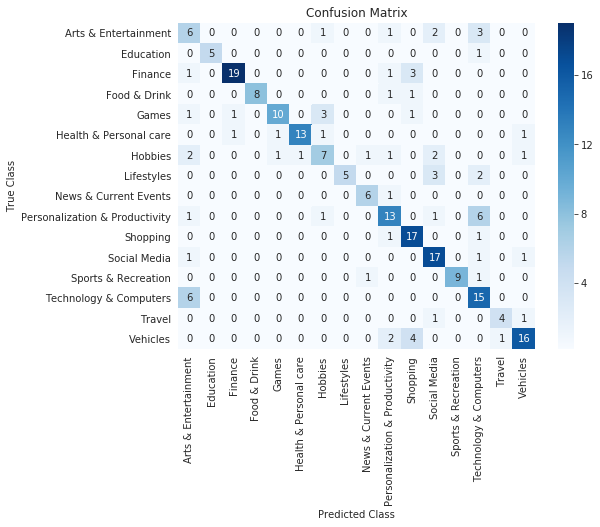

In [278]:
#@title don't show code till dblclick

plt.figure()
cm = confusion_matrix(y_true, y_preds) 

plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = segments_list, yticklabels = segments_list, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

My last check will be a combination of chi test and keras. The feature selection step will be done by Chi test and the extracted features will be entered to keras model.

In [279]:
#@title don't show code till dblclick

from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# define the grid search parameters
vocab_size = 6800
batch_size = [80, 100, 120]
epochs = [5, 8, 10]
optimizer = ['Adagrad', 'Adam', 'Nadam']

# Data preparation
x_train, x_test, y_train, y_test, encoder, tokenizer = data_preparation(x_train_set, x_test_set, y_train_set, y_test_set, vocab_size)

pipeline = Pipeline([
    ('SMOTE', SMOTE()),
    ('chi',  SelectKBest(chi2, k=3000)),
    ('model', KerasClassifier(build_fn=create, verbose=0)),
     ])

kf = StratifiedKFold(n_splits=4)

param_grid = dict(model__batch_size=batch_size, model__epochs=epochs, model__optimizer=optimizer)
model2 = RandomizedSearchCV(estimator=pipeline, cv=kf, param_distributions=param_grid, n_jobs=1)


(963, 6800) (963, 16)


In [280]:
#@title don't show code till dblclick

# Run the grid
model2.fit(x_train, np.argmax(y_train, axis = 1))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('SMOTE',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprecated',
                                                    n_jobs=1,
                                                    out_step='deprecated',
                                                    random_state=None,
                                                    ratio=None,
                                                    sampling_strategy='auto',
                                                    svm_estimator='deprecated')),
                                             ('chi',
                                              Selec...
 

In [281]:
#@title don't show code till dblclick

# Print the best parameters found
print(model2.best_params_)
print(model2.best_score_)
y_preds = model2.predict(x_test)

{'model__optimizer': 'Nadam', 'model__epochs': 5, 'model__batch_size': 120}
0.6967808975299447


In [0]:
#@title don't show code till dblclick

y_true = np.argmax(y_test, axis = 1)
segments_list = list(encoder.classes_)

In [283]:
#@title don't show code till dblclick

print("Recall: {0}".format(round(recall_score(y_true, y_preds, average='macro'),4)))
print("Precision: {0}".format(round(precision_score(y_true, y_preds, average='macro'),4)))
print("f1 score: {0}".format(round(f1_score(y_true, y_preds, average='macro'),4)))
print("cohen kappa score: {0}".format(round(cohen_kappa_score(y_true, y_preds),4)))
print(classification_report(y_true, y_preds, target_names=segments_list))

Recall: 0.6393
Precision: 0.7707
f1 score: 0.6668
cohen kappa score: 0.623
                                precision    recall  f1-score   support

          Arts & Entertainment       0.22      0.31      0.26        13
                     Education       1.00      0.83      0.91         6
                       Finance       1.00      0.71      0.83        24
                  Food & Drink       1.00      0.60      0.75        10
                         Games       1.00      0.44      0.61        16
        Health & Personal care       1.00      0.82      0.90        17
                       Hobbies       0.67      0.38      0.48        16
                    Lifestyles       1.00      0.30      0.46        10
         News & Current Events       0.71      0.71      0.71         7
Personalization & Productivity       0.65      0.50      0.56        22
                      Shopping       0.57      0.84      0.68        19
                  Social Media       0.45      0.90      0.6

<Figure size 288x288 with 0 Axes>

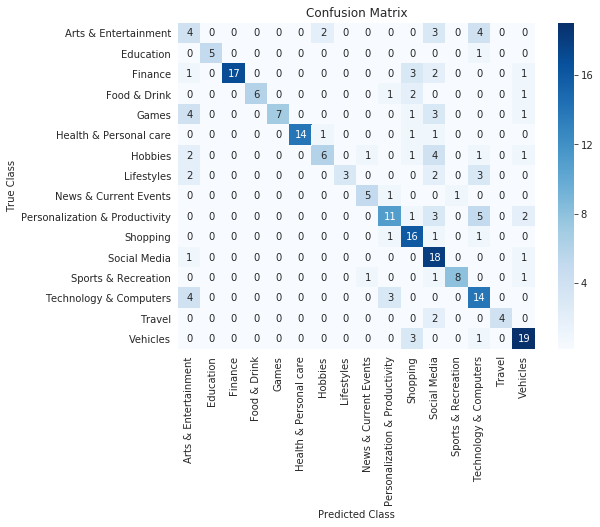

In [284]:
#@title don't show code till dblclick

plt.figure()
cm = confusion_matrix(y_true, y_preds) 

plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = segments_list, yticklabels = segments_list, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

The last model achieved  better precision 0.78 (compare to 0.77) and cohen score 0.69 (compare to 0.68) while the previous one achieved  a better Recall 0.71 (compare to 0.69) and both achieved  equal f1 score = 0.72. 

I will train the last model with the full "Examples" dataset for making the predictions of "Classify" dataset.

First I will upload the "Classify" file and prepare the data.

In [0]:
#@title don't show code till dblclick

classify = pd.read_excel('appDescriptions.xlsx', sheet_name = 'Classify')
classify = pd.DataFrame(classify)

In [286]:
#@title don't show code till dblclick

clean_classify, classify_nonEnglish = clean_dataset(classify)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [0]:
#@title don't show code till dblclick

from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
classify_test = tokenizer.texts_to_matrix(clean_classify.description, mode='tfidf')


In [0]:
classify_preds = model2.predict(classify_test)

In [0]:
segment_id_df = df[['class', 'label']].drop_duplicates().sort_values('label')
segment_to_id = dict(segment_id_df.values)
id_to_segment = dict(segment_id_df[['label', 'class']].values)
preds_classes = pd.DataFrame(classify_preds, columns = {"class"})

In [0]:
clean_classify["segment"] = preds_classes["class"].apply(lambda x: id_to_segment[x])
classify_nonEnglish["segment"] = "Not supported language"

#### Jaccard similarity

I will use a statistic method that is called "Jaccard similarity" for small samples classification in the taining set. Jaccard similarity is defined as size of intersection divided by size of union of two sets.


In [0]:
#@title don't show code till dblclick

def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [477]:
for i in range(0,len(samp_samll_seg)):
  for j in range(0,len(classify_test)):
    js = get_jaccard_sim(samp_samll_seg.description.iloc[i], clean_classify.description.iloc[j])
    if(js>0.9):  
      clean_classify.xs(j)["segment"]=samp_samll_seg["segment"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [478]:
classify_results = pd.concat([classify_nonEnglish, clean_classify])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
classify_results = classify_results.drop(["class", "original_length", "description", "package", "appName", "full_desc"], axis=1)

In [0]:
# Download results
classify_results.to_csv('app.csv')
files.download('app.csv')